<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/CodeExamples/deeplearning101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from https://iamtrask.github.io/2015/07/12/basic-python-network/ with minor modifications

In [0]:
import numpy as np

# trivial NN for classification

In [39]:
X = np.array([ [0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1] ])

y = np.array([[0,1,1,0]]).T
print("predict:\n", y)
print("based on:\n", X)

predict:
 [[0]
 [1]
 [1]
 [0]]
based on:
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


# architecture: 1 layer

input layer 4x3: observations 3 features

neurons layer: 3x1

$[4\times3] \cdot [3\times1] => [1]$


In [0]:
#define the activation function
def sigmoid(x):
  return 1. / (1 + np.exp(-x))

In [0]:

#define the derivative of the activation function
def dsigmoid(x):
  return x * (1 - x)

In [0]:
# define the loss function
def loss(prediction):
    return y - prediction


In [49]:
training = 6000
# build the synopsis: THE WEIGHTS, the initial guess of the weights. 
# we have no knowledge, so we just randomize it
np.random.seed(1)
syn0 = 2 * np.random.random((3,1)) - 1 #normalized mean 0
print (syn0.shape)


# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

for iter in range(training):

   # forward propagation step
    inputLayer = X
    #dot product
    l1 = np.dot(inputLayer, syn0)
    #activate
    output = sigmoid(l1)

    # how much did we miss by?
    output_error = loss(output)
    #back propagation step
    # multiply how much we missed by the
    # slope of the sigmoid at the values of L1  
    output_delta = output_error * dsigmoid(output)
    # how much did we miss?
 
    # update weights
    syn0 += np.dot(inputLayer.T, output_delta)
print ("Output After Training:\n", output)
print ("target: \n", y)


(3, 1)
Output After Training:
 [[0.0125443 ]
 [0.01020048]
 [0.99168925]
 [0.98977515]]
target: 
 [[0]
 [0]
 [1]
 [1]]


# architecture: 2 layer

input layer 4x3: observations 3 features

neurons layer: 3x4, 4x1

$[4\times3] \cdot [3\times4] \cdot [4\times1] => [1]$

In [50]:
np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2 * np.random.random((3, 4)) - 1
syn1 = 2 * np.random.random((4, 1)) - 1

print (syn0.shape, "\n", syn1.shape)

loss_hidden = []
loss_output = []

# 2 layers
for iterate in range(training):
  inputLayer = X  
  #dot product
  la1 = np.dot(inputLayer, syn0)
  #activate
  layer1out = sigmoid(la1)

  la2 = np.dot(layer1out, syn1)
  #activate
  outputLayer = sigmoid(la2)
  
  #calculate loss on the output layer
  outputLayer_error = loss(outputLayer)
  loss_output.append(outputLayer_error.sum())
  outputLayer_delta = outputLayer_error * dsigmoid(outputLayer)

  l1_error = outputLayer_delta.dot(syn1.T)
  loss_hidden.append(l1_error.sum())
  l1_delta = l1_error * dsigmoid(layer1out)
 
  # back propagation step
  # multiply how much we missed by the
  # slope of the sigmoid at the values in l1

  syn1 += outputLayer.T.dot(outputLayer_delta)
  syn0 += inputLayer.T.dot(l1_delta)
  
print ("Final Prediction:\n", outputLayer)

print ("target: \n", y)


(3, 4) 
 (4, 1)
Final Prediction:
 [[0.2906081 ]
 [0.28930027]
 [0.84495703]
 [0.84333511]]
target: 
 [[0]
 [0]
 [1]
 [1]]


Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'loss')

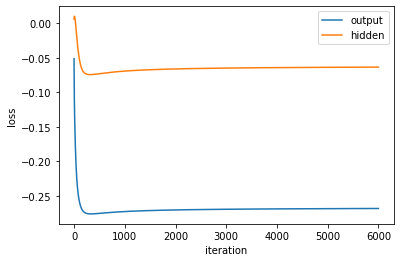

In [51]:
import pylab as pl
%pylab inline
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="hidden")
pl.legend()
pl.xlabel("iteration")
pl.ylabel("loss")